<a href="https://colab.research.google.com/github/ahmad-kental/dsl/blob/main/VerilogGitHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [2]:
%%verilog
//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output reg [3:0] count,
    output reg ten
);

always @(posedge clk or posedge rst) begin
  if (rst) begin
    count <= 4'b0000;
    ten <= 1'b0;
  end else begin
    if (count == 4'b1001) begin
      count <= 4'b0000;
      ten <= 1'b1;
    end else begin
      count <= count + 1'b1;
      ten <= 1'b0;
    end
  end
end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0]count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

always begin
    clk = 0;
    #10 clk = ~clk; // Generate 20 unit time clock
end

initial begin
    clk = 0;
    rst = 1;
    #20 rst = 0; // Initialize the clk, rst
    #200 $finish;
end

endmodule

Installing. Please wait... done!



6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

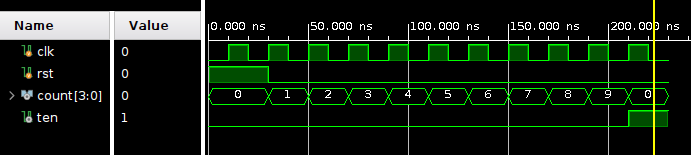

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [3]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input [1:0]A,
    input [1:0]B,
    input [1:0]C,
    input [1:0]D,
    input [1:0]SEL,
    output reg [1:0]X
);

//YOUR CODE HERE
//TIPS: IN THE VERILOG CASE STATEMENT, YOU HAVE TO LIST ALL CONDITION TO AVIOD ANY AMBIGUOUS STATEMENT;

always @(*) begin
  case (SEL)
    2'b00: X = A;
    2'b01: X = B;
    2'b10: X = C;
    2'b11: X = D;
    default: X = 2'b00; // Default case for undefined SEL values
  endcase
end

endmodule

//TESTBENCH HERE

module multiplexer_tb();

reg [1:0]A;
reg [1:0]B;
reg [1:0]C;
reg [1:0]D;
reg [1:0]SEL;
wire [1:0]X;

multiplexer multiplexer_u0(
    .A(A),
    .B(B),
    .C(C),
    .D(D),
    .SEL(SEL),
    .X(X)
);

initial begin
    A = 2'b00;
    B = 2'b01;
    C = 2'b10;
    D = 2'b11;
    SEL = 2'b00;
    #10 SEL = 2'b01;
    #10 SEL = 2'b10;
    #10 SEL = 2'b11;
    #10 $finish;
end

endmodule


5. Here is a demo testbench result for the multiplexer;

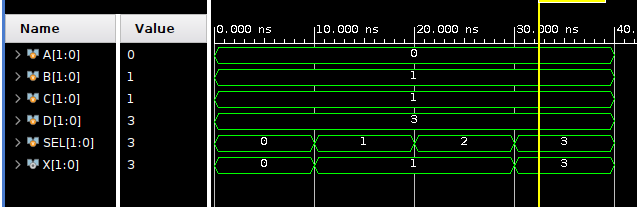

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [4]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output reg [1:0]W,
    output reg [1:0]X,
    output reg [1:0]Y,
    output reg [1:0]Z
    );

//YOUR CODE HERE

always @(*) begin
    case (SEL)
        2'b00: begin
            W = A; X = 2'b00; Y = 2'b00; Z = 2'b00;
        end
        2'b01: begin
            W = 2'b00; X = A; Y = 2'b00; Z = 2'b00;
        end
        2'b10: begin
            W = 2'b00; X = 2'b00; Y = A; Z = 2'b00;
        end
        2'b11: begin
            W = 2'b00; X = 2'b00; Y = 2'b00; Z = A;
        end
        default: begin
            W = 2'b00; X = 2'b00; Y = 2'b00; Z = 2'b00;
        end
    endcase
end

endmodule

//TESTBENCH HERE
module demultiplexer_tb;

    reg [1:0] A;
    reg [1:0] SEL;
    wire [1:0] W;
    wire [1:0] X;
    wire [1:0] Y;
    wire [1:0] Z;

    demultiplexer uut (
        .A(A),
        .SEL(SEL),
        .W(W),
        .X(X),
        .Y(Y),
        .Z(Z)
    );

    initial begin
        // Dump waveforms for debugging
        $dumpfile("demultiplexer_waveform.vcd");
        $dumpvars(0, demultiplexer_tb);

        // Initialize inputs
        A = 2'b00;
        SEL = 2'b00;

        // Apply test cases
        #10 A = 2'b10; SEL = 2'b00; // SEL = 00, W = A
        #10 A = 2'b11; SEL = 2'b01; // SEL = 01, X = A
        #10 A = 2'b01; SEL = 2'b10; // SEL = 10, Y = A
        #10 A = 2'b10; SEL = 2'b11; // SEL = 11, Z = A
        #10 A = 2'b00; SEL = 2'b00; // SEL = 00, W = A (reset case)

        // End simulation
        #10 $stop;
    end

endmodule


VCD info: dumpfile demultiplexer_waveform.vcd opened for output.
** VVP Stop(0) **
** Flushing output streams.
** Current simulation time is 60 ticks.
> ** Continue **



5. Here is a demo testbench result for the demultiplexer;

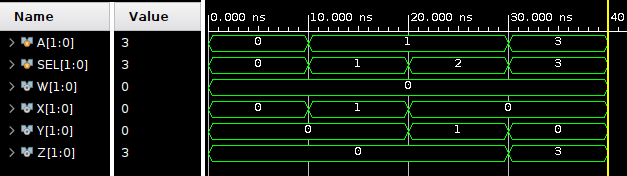

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [9]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output reg [4:0]q
);


//YOUR CODE HERE

always @(*) begin
    if (ctrl == 1'b0) begin

        q = A[3:0] + B[3:0];
    end else begin

        q = A[7:4] + B[7:4];
    end
end

endmodule

//TESTBENCH HERE

module nibbleadd_tb;

    // Inputs
    reg [7:0] A;
    reg [7:0] B;
    reg ctrl;

    // Output
    wire [4:0] q;

    nibbleadd uut (
        .A(A),
        .B(B),
        .ctrl(ctrl),
        .q(q)
    );

    initial begin

        $dumpfile("nibbleadd_waveform.vcd");
        $dumpvars(0, nibbleadd_tb);

        // Initialize inputs
        A = 8'b00000000;
        B = 8'b00000000;
        ctrl = 1'b0;

        // Apply test cases
        #10 A = 8'b00001010; B = 8'b00000101; ctrl = 1'b0;
        #10 A = 8'b11110000; B = 8'b00010000; ctrl = 1'b1;
        #10 A = 8'b10101010; B = 8'b01010101; ctrl = 1'b0;
        #10 A = 8'b11001100; B = 8'b00110011; ctrl = 1'b1;
        #10 A = 8'b00000000; B = 8'b00000000; ctrl = 1'b0;

        // End simulation
        #10 $stop;
    end

endmodule

VCD info: dumpfile nibbleadd_waveform.vcd opened for output.
** VVP Stop(0) **
** Flushing output streams.
** Current simulation time is 60 ticks.
> ** Continue **



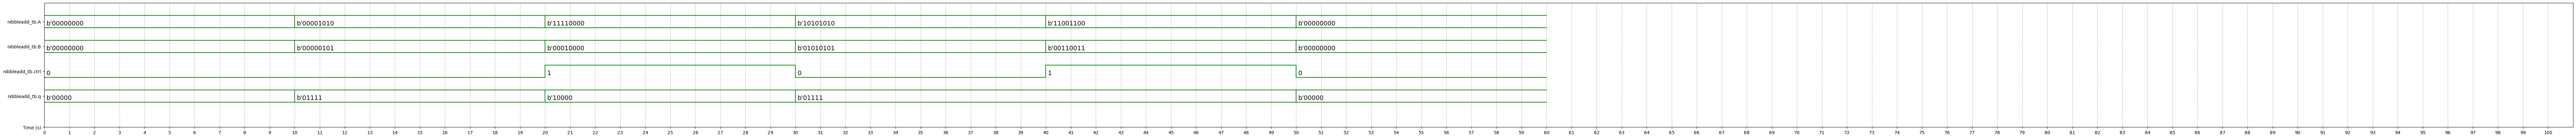

In [11]:
%%waveform nibbleadd_waveform.vcd
sign_list = ['nibbleadd_tb.A','nibbleadd_tb.B','nibbleadd_tb.ctrl','nibbleadd_tb.q']
time_begin = 0
time_end = 100
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the nibbleadd;

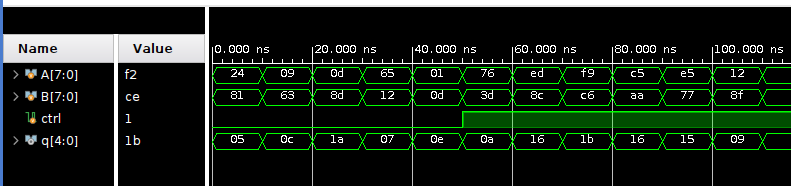

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [15]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output reg [4:0] q
);

always @(*) begin
    if (rst) begin
        // Reset condition: set q to 0
        q = 5'b0;
    end else begin
        if (ctrl == 1'b0) begin
            // Add A and B
            q = A + B;
        end else begin
            // Subtract C from A
            q = A - C;
        end
    end
end

endmodule

//TESTBENCH

module CCTA_tb;

    // Inputs
    reg [3:0] A;
    reg [3:0] B;
    reg [3:0] C;
    reg rst;
    reg ctrl;

    // Output
    wire [4:0] q;

    // Instantiate the Unit Under Test (UUT)
    CCTA uut (
        .A(A),
        .B(B),
        .C(C),
        .rst(rst),
        .ctrl(ctrl),
        .q(q)
    );

    initial begin
        // Dump waveforms for debugging
        $dumpfile("CCTA_waveform.vcd");
        $dumpvars(0, CCTA_tb);

        // Initialize inputs
        A = 4'b0000;
        B = 4'b0000;
        C = 4'b0000;
        rst = 1'b0;
        ctrl = 1'b0;

        // Apply test cases
        #10 rst = 1'b1;
        #10 rst = 1'b0;
        #10 A = 4'b0101; B = 4'b0011; ctrl = 1'b0;
        #10 A = 4'b1010; C = 4'b0011; ctrl = 1'b1;
        #10 A = 4'b1111; B = 4'b0001; ctrl = 1'b0;
        #10 A = 4'b1000; C = 4'b0111; ctrl = 1'b1;
        #10 rst = 1'b1;
        #10 $stop;
    end

endmodule

VCD info: dumpfile CCTA_waveform.vcd opened for output.
** VVP Stop(0) **
** Flushing output streams.
** Current simulation time is 80 ticks.
> ** Continue **



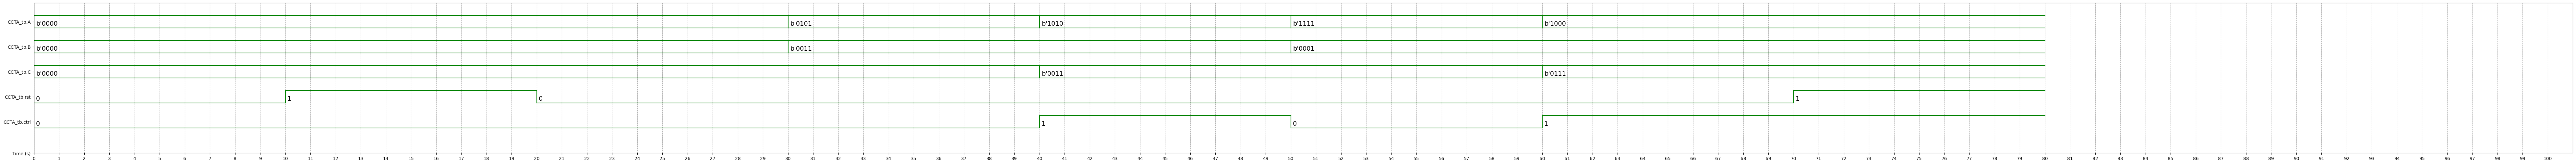

In [16]:
%%waveform CCTA_waveform.vcd
sign_list = ['CCTA_tb.A','CCTA_tb.B','CCTA_tb.C','CCTA_tb.rst','CCTA_tb.ctrl']
time_begin = 0
time_end = 100
base = 'bin' # bin, dec, dec2, hex, octal

5. Here is a demo testbench result for the CCTA;

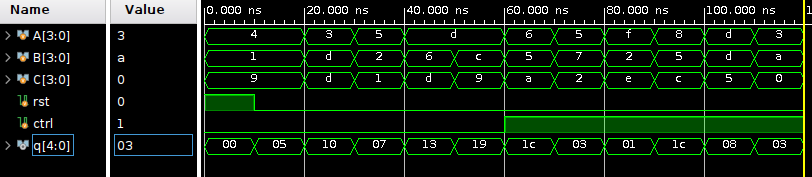